In [1]:
import pandas as pd
import numpy as np
from test_class import Test

In [2]:
data = pd.read_csv('RTT_data.csv')
data_args = {
    'data seed': 11,
    'model seed': 50,
    'distance clients': [0, 2, 3, 6],
    'distance augments': [0.5, 0.5, 0.5, 0.5],
    'tolerance': 5,
    'exclude dtypes': 'object',
    'drop labels': ['GroundTruthRange[m]'],
    'target labels': ['GroundTruthRange[m]'],
    'test size 1': 0.2,
    'test size 2': 0.25
}

In [3]:
test = Test(data, data_args)

Number of samples: 29581
Features per sample: 10
Columns:
%Timestamp[s], GroundTruthPositionX[m], GroundTruthPositionY[m], GroundTruthPositionZ[m], ML_range_estimate[m], AP_positionX[m], AP_positionY[m], AP_positionZ[m], AP_index, ToD_factor[m]

Total Client Training Samples: 17748
Total Client Training Labels: 17748
Total Validation Samples: 5917
Total Validation Labels: 5917
Total Test Samples: 5916
Total Test Labels: 5916


In [4]:
fedavg_log = np.load('history/important baselines/fedavg_log_5.npy')
fedavg_test_mse = np.load('history/important baselines/fedavg_test_mse_5.npy')
Mt = (np.ones(50) * 5).astype('int32')

In [5]:
log_path = 'history/important baselines/fedavg_log_5.npy'
test_path = 'history/important baselines/fedavg_test_mse_5.npy'
test.load_baseline_fedavg_data(test_path, log_path)

In [6]:
w, b, conf_mse, conf_log = test.run_confeddi_test(1000, 10, rounds = 50, Mt = Mt, context = [0])

[0]
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50


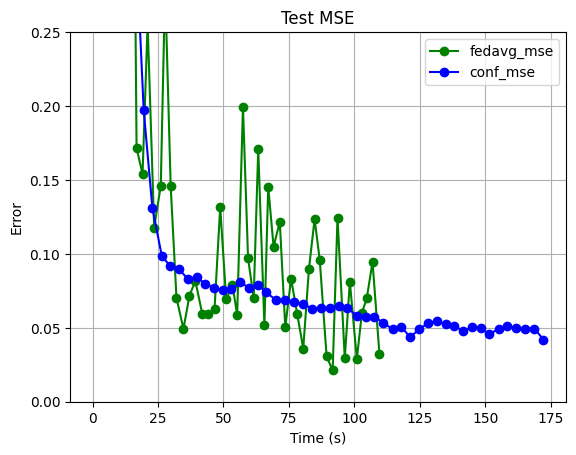

In [7]:
test.plot_error([(fedavg_log, fedavg_test_mse), (conf_log, conf_mse)], ['green', 'blue'], ['fedavg_mse', 'conf_mse'], 0, 0.25)

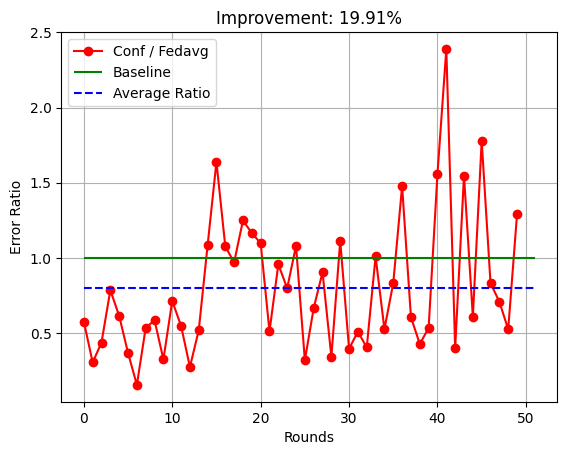

In [8]:
test.plot_improvement(conf_mse)

In [9]:
a_search = np.logspace(-3, 3, 7)
l_search = np.logspace(-3, 3, 7)
test.confeddi_gs(a_search, l_search, Mt = Mt, rounds = 50, context = [0])

Training Model 1
[0]
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 2
[0]
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 3
[0]
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 4
[0]
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 5
[0]
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 6
[0]
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 7
[0]
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 8
[0]
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 9
[0]
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

T

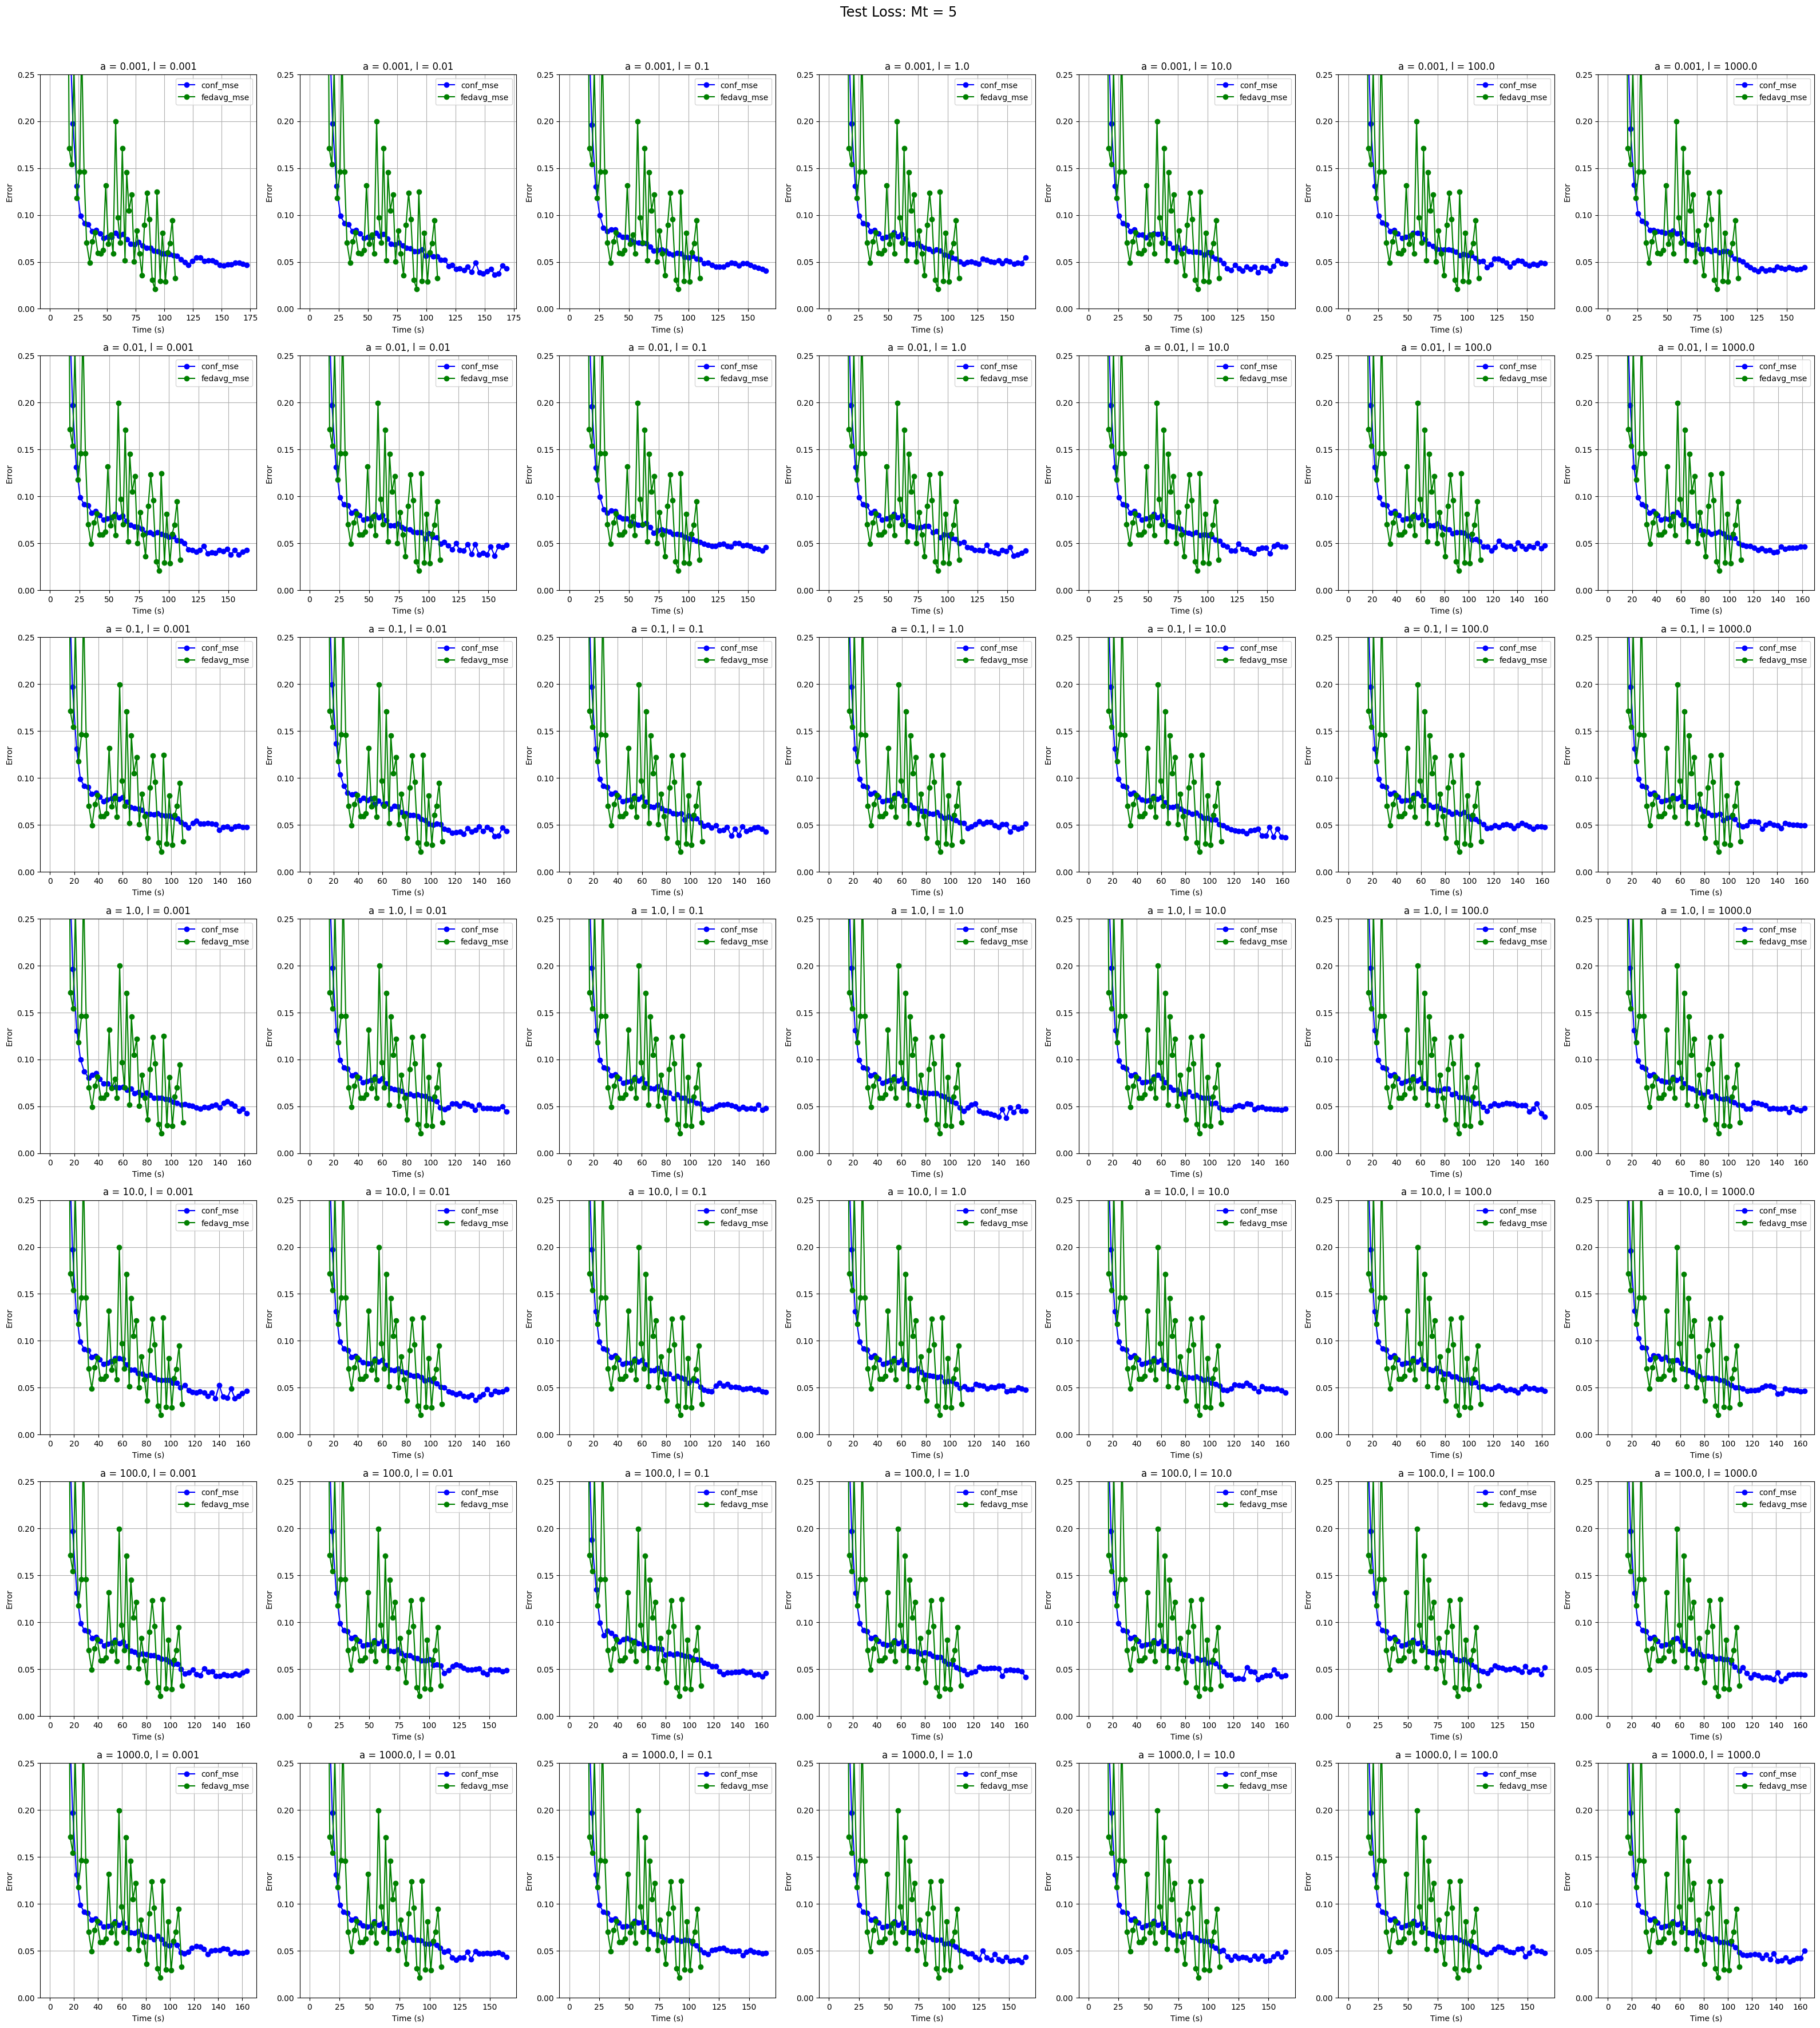

In [10]:
test.confeddi_gs_test_plots((40, 40), 0, 0.25)

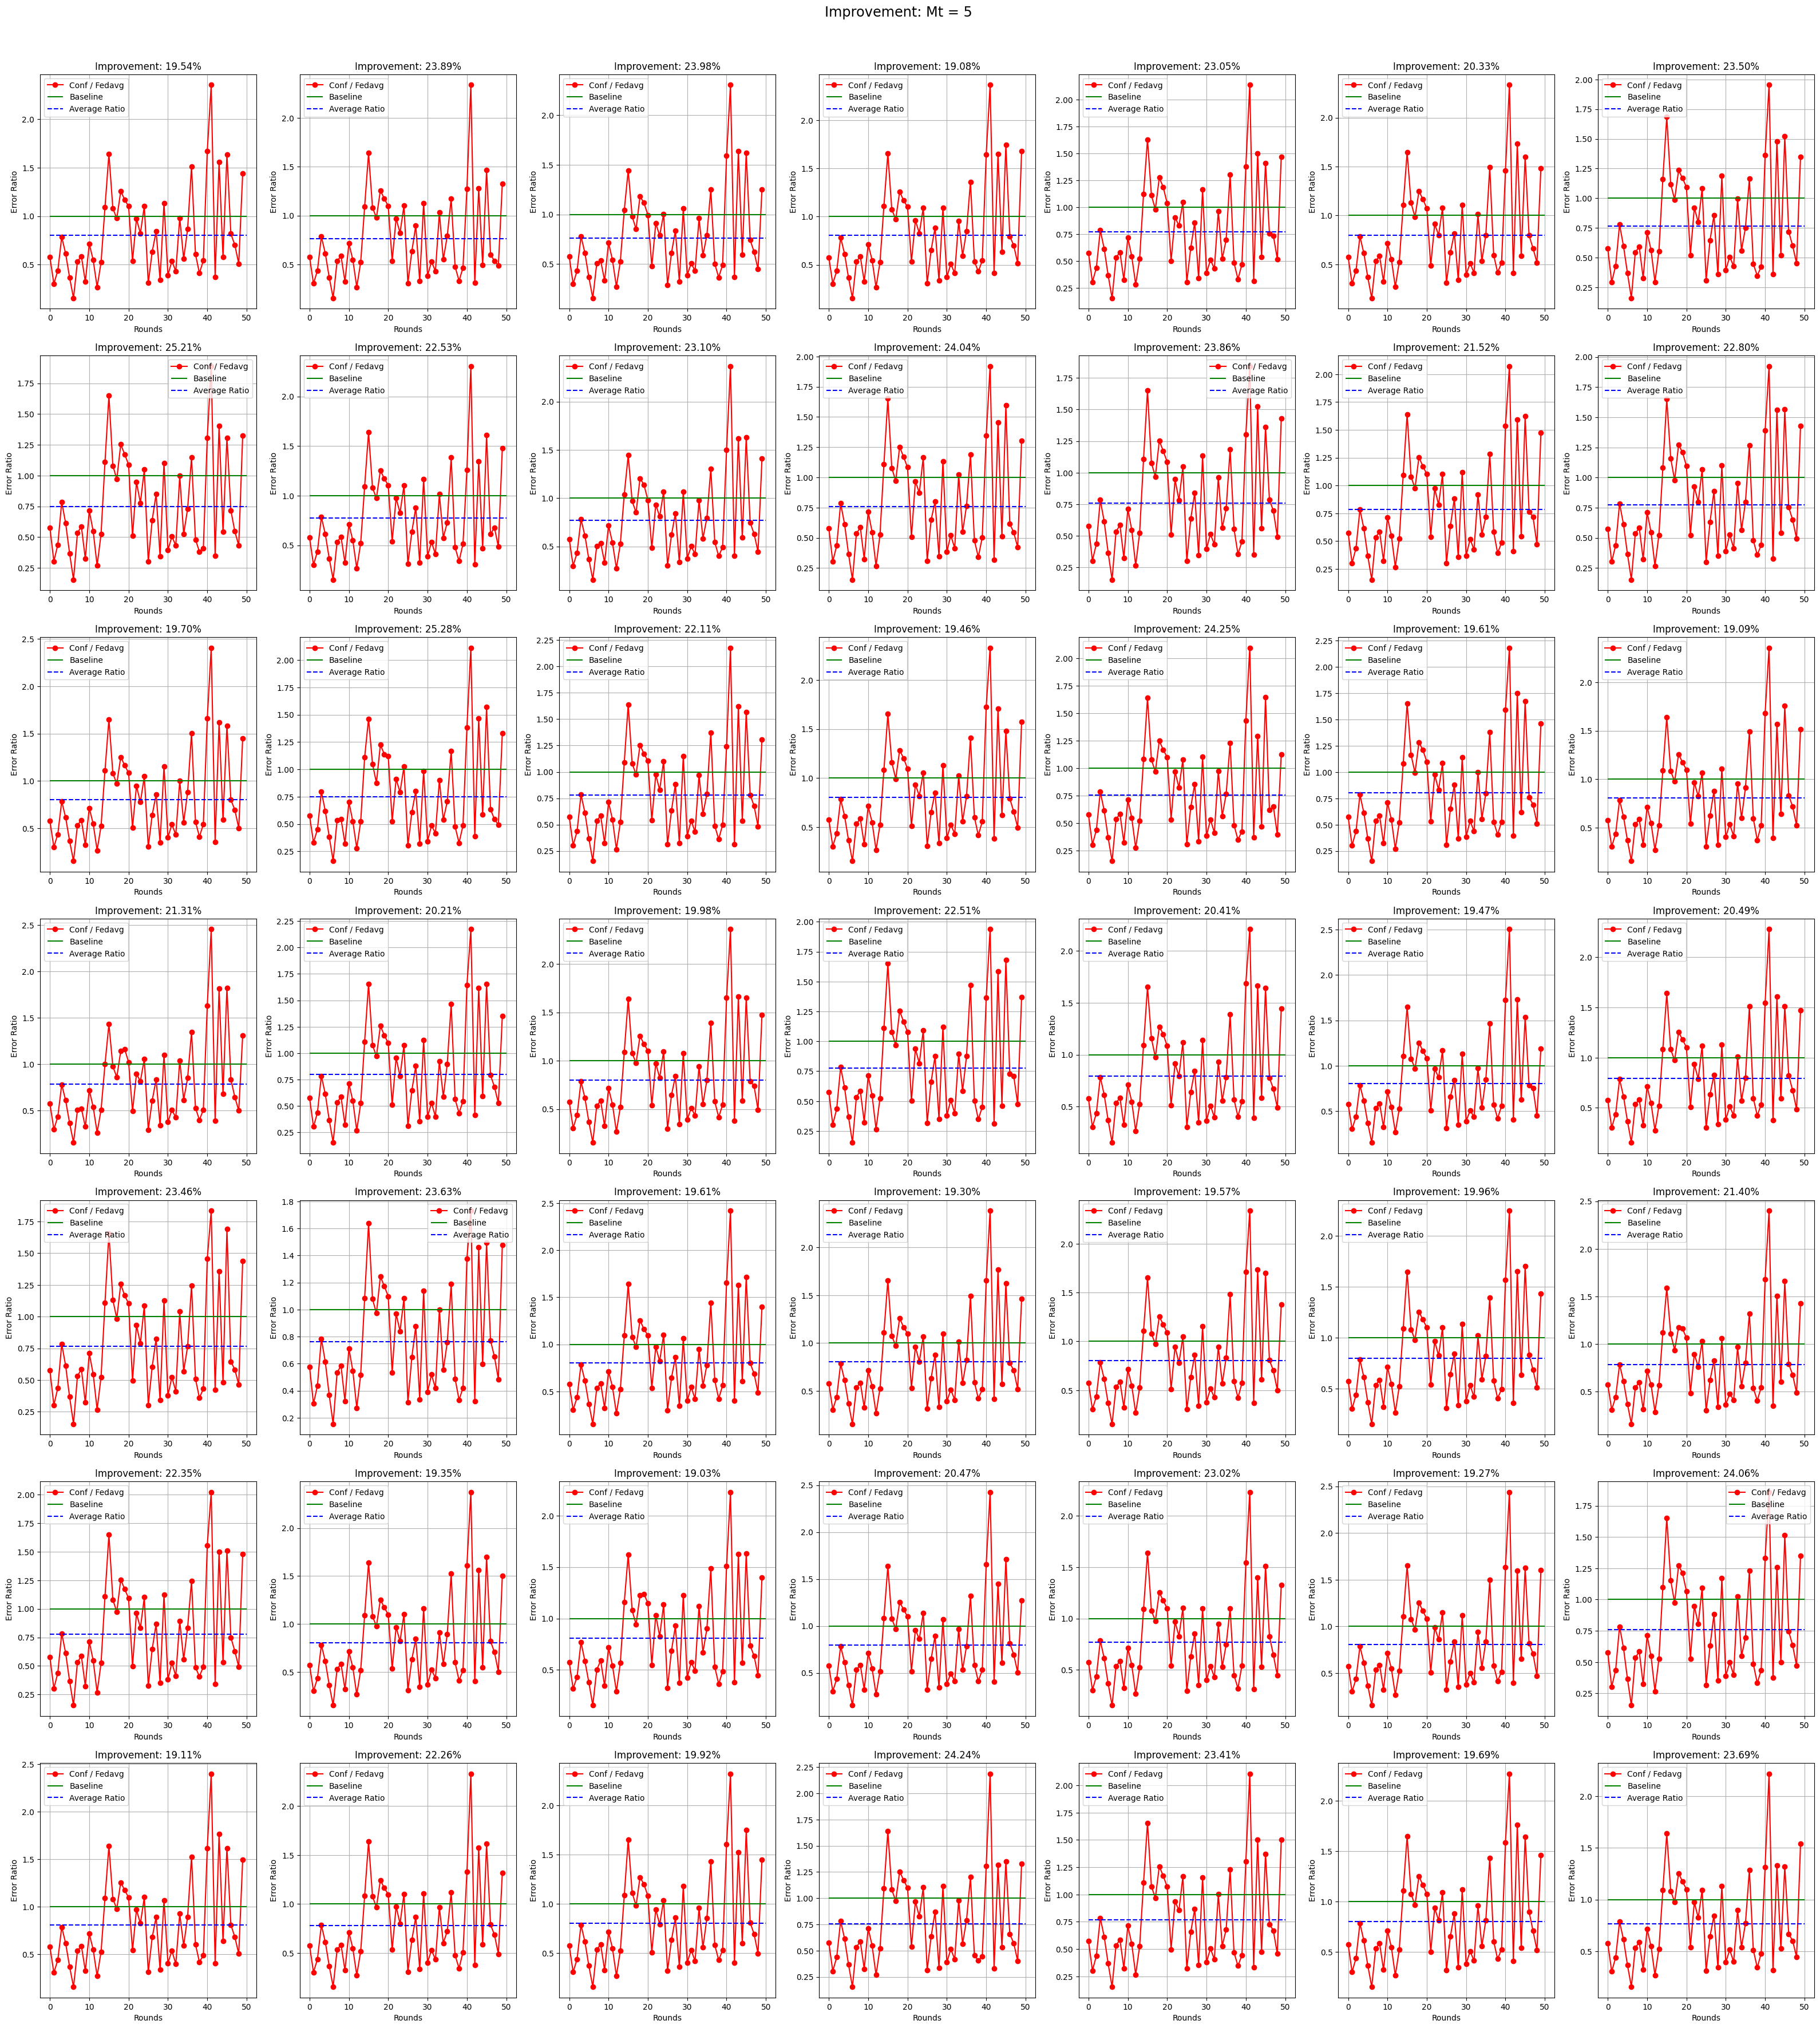

In [11]:
test.confeddi_gs_improvement_plots((40, 40))

In [10]:
context_elements = [
    [0, 1, 2, 3, 4],
    [0],
    [1],
    [4],
    [1, 2, 3, 4],
    [0, 2, 3, 4],
    [0, 1, 2, 3]
]

In [11]:
test.confeddi_as(context_elements, 0.1, 0.01, Mt = Mt, rounds = 50)

Training Model 1
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 2
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 3
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 4
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 5
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 6
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 7
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50



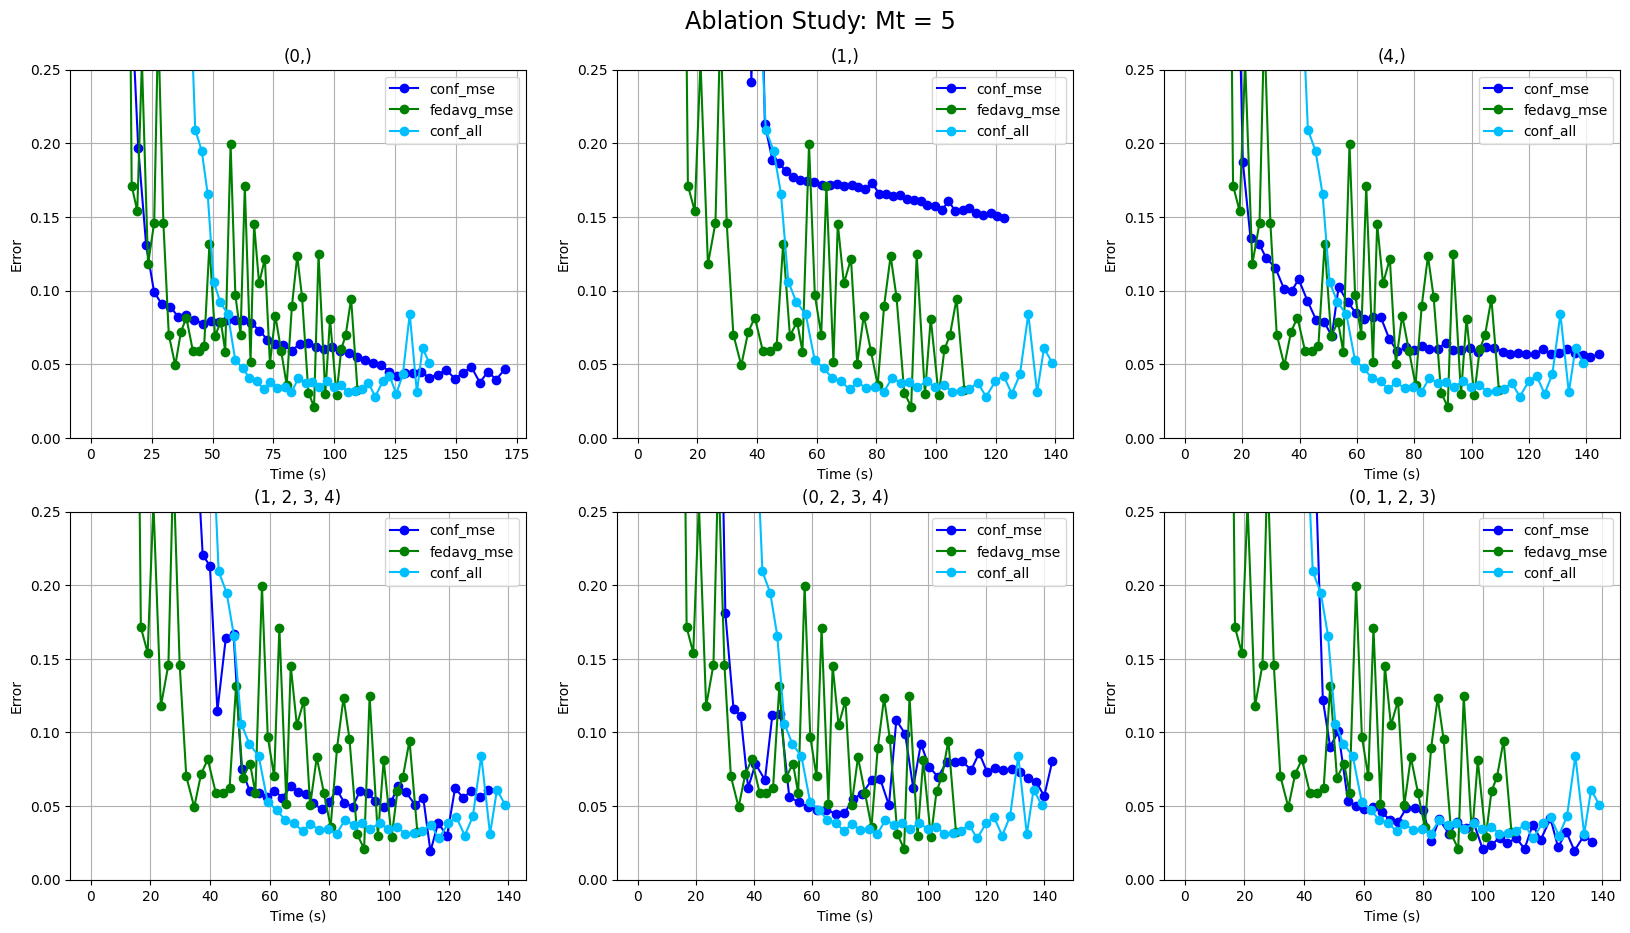

In [12]:
test.confeddi_as_test_plots((20, 10), 0, 0.25, 2, 3)

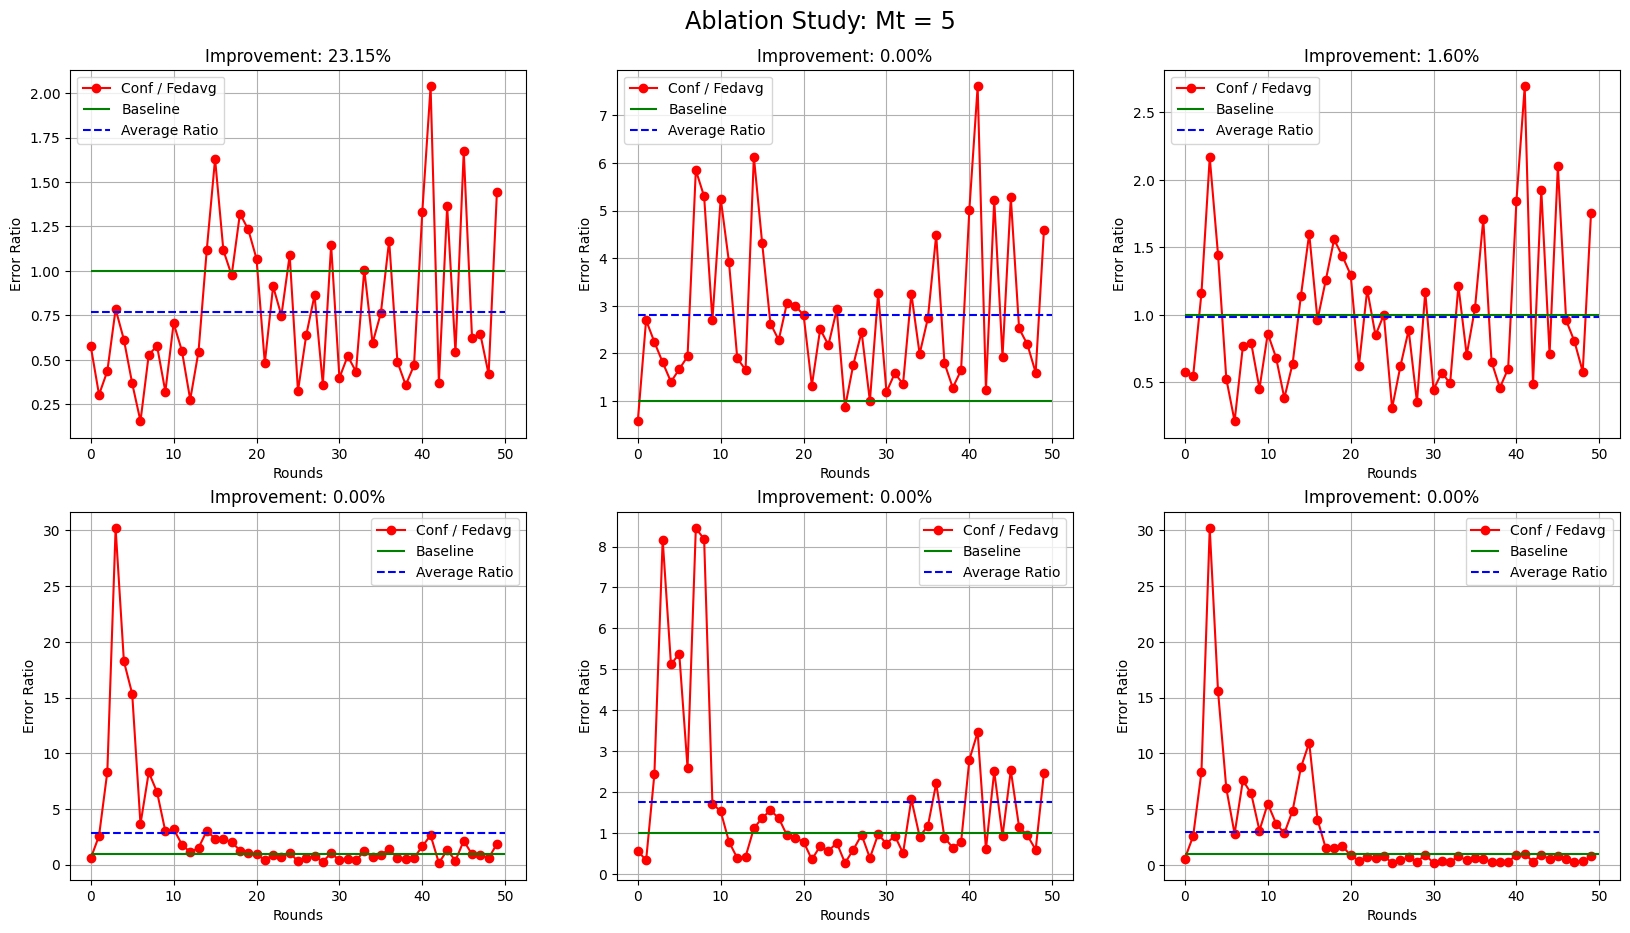

In [13]:
test.confeddi_as_improvement_plots((20, 10), 2, 3)